In [1]:
%pylab inline
from pandas import *
import pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
def myEval(S):
    s=S.replace("]","").replace("[","")
    R=[]
    for e in s.split(","):
        R.append(float(e))
    return R

def myEval2D(S):
    M=[]
    s=S.replace("[[","").replace("]]","")
    for E in s.split("],["):
        R=[]
        for e in E.split(","):
            R.append(float(e))
        M.append(R)
    return M

In [3]:
def rolling_average(data, window_size):
    if window_size < 1:
        raise ValueError("window_size must be at least 1")

    # Calculate padding size
    pad_size = window_size // 2

    # Pad the data at both ends with repeated boundary values
    padded_data = np.pad(data, pad_width=pad_size, mode='edge')

    # Calculate the rolling average using a uniform filter
    rolling_avg = np.convolve(padded_data, np.ones(window_size)/window_size, mode='valid')

    return rolling_avg

def step_function_expand(lists, target_length):
    expanded_lists = []
    
    for lst in lists:
        current_length = len(lst)
        
        # Generate the original x-axis values based on the current length
        x_original = np.linspace(0, 1, current_length, endpoint=False)
        
        # Generate the new x-axis values for the target length
        x_target = np.linspace(0, 1, target_length, endpoint=False)
        
        # Create a list to store the expanded values
        expanded_list = []
        
        # Use step function to repeat each value until the next one
        for i in range(current_length - 1):
            start = x_original[i]
            end = x_original[i + 1]
            count = np.sum((x_target >= start) & (x_target < end))
            expanded_list.extend([lst[i]] * count)
        
        # Handle the last segment separately (from last original x to the end)
        count = np.sum(x_target >= x_original[-1])
        expanded_list.extend([lst[-1]] * count)
        
        expanded_lists.append(expanded_list)
    
    return expanded_lists

def expandToMean(lists,binWidth=10):
    theLength=[]
    for l in lists:
        theLength.append(len(l))
    target_length=int(mean(theLength)*binWidth)
    Y=numpy.array(step_function_expand(lists, target_length))
    pooled_array = numpy.mean(Y[:len(Y) - len(Y) % binWidth].reshape(-1, binWidth), axis=1)    
    return pooled_array

#L=step_function_expand(E[0],5000)
#plot(rolling_average(numpy.array(L).mean(0),10))

In [4]:
collector=dict()
Mys=[0.0001,0.001,0.01]
Ks=[1,3,5,7]
for K in Ks:
    for my in Mys:
        E=[]
        P=[]
        HD=[]
        for i in range(21):
            E.append([])
            P.append([])
            HD.append([])
        for rep in range(50):
            #for who in range(3):
            data=read_csv(r"C:\Users\pmh\NKEarlyData\dataAllStart.tar\dataAllStart\data_{0}_{1}_{2}.csv".format(K,my,rep))
            for i in range(len(data)):
                pos=data["dip0peak1"][i]
                dummy=myEval(data["LODe"][i])
                E[pos].append(dummy)
                dummy=myEval(data["LODp"][i])
                P[pos].append(dummy)
                dummy=myEval(data["LODhd"][i])
                HD[pos].append(dummy)
        collector["{0} {1}".format(K,my)]=[E,P,HD]
        
        

In [16]:
collectorShrunk=dict()
where=1
for my in Mys:
    for K in Ks:
        res=[]
        for who in range(3):
            M=collector["{0} {1}".format(K,my)][who]
            R=[]
            for i in range(21):
                L=[]
                for row in M[i]:
                    L.append(len(row))
                binWidth=10
                theLength=int(ceil(mean(L))*binWidth)
                Y=numpy.array(step_function_expand(M[i],theLength))
                Y=Y.mean(0)
                Y = Y.reshape(-1, 10).mean(axis=1)
                R.append(Y)
            res.append(R)
        collectorShrunk["{0} {1}".format(K,my)]=res

KeyboardInterrupt: 

K=1, μ=0.0001, Start Condition 0: p-value (Start) = 1.0264e-19
K=1, μ=0.0001, End Condition 0: p-value (End) = 1.3819e-11
K=1, μ=0.0001, Start Condition 1: p-value (Start) = 1.0264e-19
K=1, μ=0.0001, End Condition 1: p-value (End) = 5.4289e-12
K=1, μ=0.0001, Start Condition 2: p-value (Start) = 1.0264e-19
K=1, μ=0.0001, End Condition 2: p-value (End) = 2.0873e-12
K=1, μ=0.0001, Start Condition 3: p-value (Start) = 1.8155e-18
K=1, μ=0.0001, End Condition 3: p-value (End) = 5.4289e-12
K=1, μ=0.0001, Start Condition 4: p-value (Start) = 4.4158e-19
K=1, μ=0.0001, End Condition 4: p-value (End) = 2.0873e-12
K=1, μ=0.0001, Start Condition 5: p-value (Start) = 7.1522e-18
K=1, μ=0.0001, End Condition 5: p-value (End) = 2.0873e-12
K=1, μ=0.0001, Start Condition 6: p-value (Start) = 2.7061e-17
K=1, μ=0.0001, End Condition 6: p-value (End) = 2.0873e-12
K=1, μ=0.0001, Start Condition 7: p-value (Start) = 2.7061e-17
K=1, μ=0.0001, End Condition 7: p-value (End) = 2.0873e-12
K=1, μ=0.0001, Start Con

K=3, μ=0.01, Start Condition 0: p-value (Start) = 4.7806e-21
K=3, μ=0.01, End Condition 0: p-value (End) = 5.4320e-09
K=3, μ=0.01, Start Condition 1: p-value (Start) = 2.2732e-20
K=3, μ=0.01, End Condition 1: p-value (End) = 5.4320e-09
K=3, μ=0.01, Start Condition 2: p-value (Start) = 1.0264e-19
K=3, μ=0.01, End Condition 2: p-value (End) = 5.4320e-09
K=3, μ=0.01, Start Condition 3: p-value (Start) = 7.1522e-18
K=3, μ=0.01, End Condition 3: p-value (End) = 5.4320e-09
K=3, μ=0.01, Start Condition 4: p-value (Start) = 2.7061e-17
K=3, μ=0.01, End Condition 4: p-value (End) = 5.4320e-09
K=3, μ=0.01, Start Condition 5: p-value (Start) = 1.3323e-15
K=3, μ=0.01, End Condition 5: p-value (End) = 5.4320e-09
K=3, μ=0.01, Start Condition 6: p-value (Start) = 1.2546e-14
K=3, μ=0.01, End Condition 6: p-value (End) = 5.4320e-09
K=3, μ=0.01, Start Condition 7: p-value (Start) = 1.0347e-13
K=3, μ=0.01, End Condition 7: p-value (End) = 5.4320e-09
K=3, μ=0.01, Start Condition 8: p-value (Start) = 7.8537

K=7, μ=0.0001, End Condition 9: p-value (End) = 1.0347e-13
K=7, μ=0.0001, Start Condition 10: p-value (Start) = 2.7061e-17
K=7, μ=0.0001, End Condition 10: p-value (End) = 1.2546e-14
K=7, μ=0.0001, Start Condition 11: p-value (Start) = 1.3323e-15
K=7, μ=0.0001, End Condition 11: p-value (End) = 1.0347e-13
K=7, μ=0.0001, Start Condition 12: p-value (Start) = 5.1070e-15
K=7, μ=0.0001, End Condition 12: p-value (End) = 2.8932e-13
K=7, μ=0.0001, Start Condition 13: p-value (Start) = 1.2546e-14
K=7, μ=0.0001, End Condition 13: p-value (End) = 2.8932e-13
K=7, μ=0.0001, Start Condition 14: p-value (Start) = 1.2546e-14
K=7, μ=0.0001, End Condition 14: p-value (End) = 7.8537e-13
K=7, μ=0.0001, Start Condition 15: p-value (Start) = 1.0347e-13
K=7, μ=0.0001, End Condition 15: p-value (End) = 2.0873e-12
K=7, μ=0.0001, Start Condition 16: p-value (Start) = 2.0873e-12
K=7, μ=0.0001, End Condition 16: p-value (End) = 1.3819e-11
K=7, μ=0.0001, Start Condition 17: p-value (Start) = 2.0873e-12
K=7, μ=0.

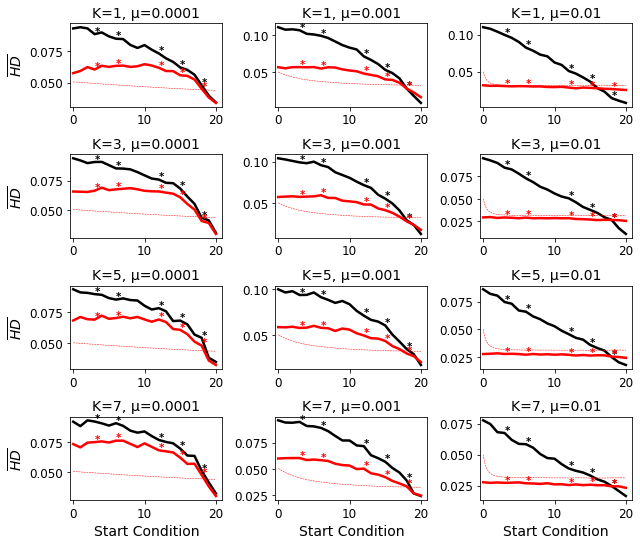

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.stats import ks_2samp

# Load the colormap and data
cmapWinter = plt.get_cmap('winter')
driftCollector = pickle.load(open(r"C:\Users\pmh\NKEarlyData\driftCollector.p", "rb"))
names = ['E', 'P', 'HD']

# Define the mutation rates and K values
Mys = [0.0001, 0.001, 0.01]
Ks = [1, 3, 5, 7]

plt.figure(figsize=(9, 8))
where = 1
num_rows = 4
num_cols = 3

# Loop through K values (rows) and mutation rates (columns)
for row, K in enumerate(Ks):
    for col, my in enumerate(Mys):
        ax = plt.subplot(num_rows, num_cols, where)
        where += 1
        
        # Load the drift data for HD
        D = driftCollector[f"{my} {names[2]}"]
        D = np.array(D)
        drift_mean = D.mean(axis=0)
        drift_start_distribution = D[:, 0]

        # Load the shrunk data for HD
        M = collectorShrunk[f"{K} {my}"][2]
        
        # Initialize lists to collect distributions
        start_distributions = []
        end_distributions = []
        conditions = range(21)
        
        # Extract start and end distributions for each starting condition
        for i in conditions:
            start_vals = []
            end_vals = []
            
            for replicate in range(50):
                if len(M[i]) > 0:
                    start_vals.append(M[i][0])  # Start point (generation 0)
                    end_vals.append(M[i][-1])  # End point (last generation)
            
            start_distributions.append(start_vals)
            end_distributions.append(end_vals)
        
        # Calculate the mean of start and end points for plotting
        start_means = [np.mean(start_distributions[i]) if len(start_distributions[i]) > 0 else np.nan for i in conditions]
        end_means = [np.mean(end_distributions[i]) if len(end_distributions[i]) > 0 else np.nan for i in conditions]
        
        # Plot the mean start and end lines with bold lines
        ax.plot(conditions, start_means, linestyle='-', color='black', linewidth=2.5, label='Start Mean')
        ax.plot(conditions, end_means, linestyle='-', color='red', linewidth=2.5, label='End Mean')
        
        # Plot the mean drift line in bold
        ax.plot(np.linspace(0, 20, len(drift_mean)), drift_mean, 'r--', linewidth=0.5, label='Drift Mean')
        #ax.plot(np.linspace(0, 20, len(drift_mean)), drift_mean, 'k+', linewidth=2.5, label='Drift Mean')
        # Perform KS tests and print p-values in scientific notation
        for i in conditions:
            if len(start_distributions[i]) > 1:
                ks_stat_start, p_value_start = ks_2samp(start_distributions[i], drift_start_distribution)
                print(f"K={K}, μ={my}, Start Condition {i}: p-value (Start) = {p_value_start:.4e}")
                
                if i in [3, 6, 12, 15, 18] and p_value_start < 0.05:
                    ax.text(i, start_means[i], '*', color='black', fontsize=10, fontweight='bold')
            
            if len(end_distributions[i]) > 1:
                ks_stat_end, p_value_end = ks_2samp(end_distributions[i], drift_start_distribution)
                print(f"K={K}, μ={my}, End Condition {i}: p-value (End) = {p_value_end:.4e}")
                
                if i in [3, 6, 12, 15, 18] and p_value_end < 0.05:
                    ax.text(i, end_means[i], '*', color='red', fontsize=10, fontweight='bold')
        
        # Set the title for each subplot
        ax.set_title(f"K={K}, μ={my}", fontsize=14)

        # Show y-axis label only on the first column
        if col == 0:
            ax.set_ylabel(r"$\overline{HD}$", fontsize=14)

        # Show x-axis label only on the last row
        if row == num_rows - 1:
            ax.set_xlabel("Start Condition", fontsize=14)
        
        # Set x-axis limits
        ax.set_xlim(-0.4, 20.9)

        # Increase x-tick font size
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        
        # Add legend to the last subplot
        #if row == num_rows - 1 and col == num_cols - 1:
            #ax.legend(loc='upper right', fontsize=)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
#plt.savefig('KS-Test_StartEnd_Bold.pdf', dpi=300, bbox_inches='tight')
plt.show()


K=1, μ=0.0001, Start Condition 0: p-value (Start) = 1.0264e-19
K=1, μ=0.0001, End Condition 0: p-value (End) = 1.3819e-11
K=1, μ=0.0001, Start Condition 1: p-value (Start) = 1.0264e-19
K=1, μ=0.0001, End Condition 1: p-value (End) = 5.4289e-12
K=1, μ=0.0001, Start Condition 2: p-value (Start) = 1.0264e-19
K=1, μ=0.0001, End Condition 2: p-value (End) = 2.0873e-12
K=1, μ=0.0001, Start Condition 3: p-value (Start) = 1.8155e-18
K=1, μ=0.0001, End Condition 3: p-value (End) = 5.4289e-12
K=1, μ=0.0001, Start Condition 4: p-value (Start) = 4.4158e-19
K=1, μ=0.0001, End Condition 4: p-value (End) = 2.0873e-12
K=1, μ=0.0001, Start Condition 5: p-value (Start) = 7.1522e-18
K=1, μ=0.0001, End Condition 5: p-value (End) = 2.0873e-12
K=1, μ=0.0001, Start Condition 6: p-value (Start) = 2.7061e-17
K=1, μ=0.0001, End Condition 6: p-value (End) = 2.0873e-12
K=1, μ=0.0001, Start Condition 7: p-value (Start) = 2.7061e-17
K=1, μ=0.0001, End Condition 7: p-value (End) = 2.0873e-12
K=1, μ=0.0001, Start Con

K=3, μ=0.01, Start Condition 1: p-value (Start) = 2.2732e-20
K=3, μ=0.01, End Condition 1: p-value (End) = 5.4320e-09
K=3, μ=0.01, Start Condition 2: p-value (Start) = 1.0264e-19
K=3, μ=0.01, End Condition 2: p-value (End) = 5.4320e-09
K=3, μ=0.01, Start Condition 3: p-value (Start) = 7.1522e-18
K=3, μ=0.01, End Condition 3: p-value (End) = 5.4320e-09
K=3, μ=0.01, Start Condition 4: p-value (Start) = 2.7061e-17
K=3, μ=0.01, End Condition 4: p-value (End) = 5.4320e-09
K=3, μ=0.01, Start Condition 5: p-value (Start) = 1.3323e-15
K=3, μ=0.01, End Condition 5: p-value (End) = 5.4320e-09
K=3, μ=0.01, Start Condition 6: p-value (Start) = 1.2546e-14
K=3, μ=0.01, End Condition 6: p-value (End) = 5.4320e-09
K=3, μ=0.01, Start Condition 7: p-value (Start) = 1.0347e-13
K=3, μ=0.01, End Condition 7: p-value (End) = 5.4320e-09
K=3, μ=0.01, Start Condition 8: p-value (Start) = 7.8537e-13
K=3, μ=0.01, End Condition 8: p-value (End) = 5.4320e-09
K=3, μ=0.01, Start Condition 9: p-value (Start) = 5.4289

K=7, μ=0.001, Start Condition 0: p-value (Start) = 4.7806e-21
K=7, μ=0.001, End Condition 0: p-value (End) = 5.4289e-12
K=7, μ=0.001, Start Condition 1: p-value (Start) = 2.2732e-20
K=7, μ=0.001, End Condition 1: p-value (End) = 5.4289e-12
K=7, μ=0.001, Start Condition 2: p-value (Start) = 2.2732e-20
K=7, μ=0.001, End Condition 2: p-value (End) = 5.4289e-12
K=7, μ=0.001, Start Condition 3: p-value (Start) = 2.2732e-20
K=7, μ=0.001, End Condition 3: p-value (End) = 5.4289e-12
K=7, μ=0.001, Start Condition 4: p-value (Start) = 4.4158e-19
K=7, μ=0.001, End Condition 4: p-value (End) = 1.3819e-11
K=7, μ=0.001, Start Condition 5: p-value (Start) = 4.4158e-19
K=7, μ=0.001, End Condition 5: p-value (End) = 5.4289e-12
K=7, μ=0.001, Start Condition 6: p-value (Start) = 4.4158e-19
K=7, μ=0.001, End Condition 6: p-value (End) = 1.3819e-11
K=7, μ=0.001, Start Condition 7: p-value (Start) = 7.1522e-18
K=7, μ=0.001, End Condition 7: p-value (End) = 1.3819e-11
K=7, μ=0.001, Start Condition 8: p-value

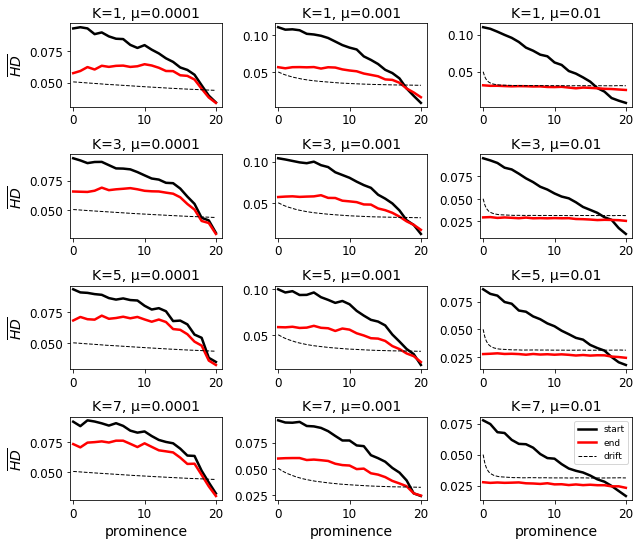

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.stats import ks_2samp

# Load the colormap and data
cmapWinter = plt.get_cmap('winter')
driftCollector = pickle.load(open(r"C:\Users\pmh\NKEarlyData\driftCollector.p", "rb"))
names = ['E', 'P', 'HD']

# Define the mutation rates and K values
Mys = [0.0001, 0.001, 0.01]
Ks = [1, 3, 5, 7]

plt.figure(figsize=(9, 8))
where = 1
num_rows = 4
num_cols = 3

# Loop through K values (rows) and mutation rates (columns)
for row, K in enumerate(Ks):
    for col, my in enumerate(Mys):
        ax = plt.subplot(num_rows, num_cols, where)
        where += 1
        
        # Load the drift data for HD
        D = driftCollector[f"{my} {names[2]}"]
        D = np.array(D)
        drift_mean = D.mean(axis=0)
        drift_start_distribution = D[:, 0]

        # Load the shrunk data for HD
        M = collectorShrunk[f"{K} {my}"][2]
        
        # Initialize lists to collect distributions
        start_distributions = []
        end_distributions = []
        conditions = range(21)
        
        # Extract start and end distributions for each starting condition
        for i in conditions:
            start_vals = []
            end_vals = []
            
            for replicate in range(50):
                if len(M[i]) > 0:
                    start_vals.append(M[i][0])  # Start point (generation 0)
                    end_vals.append(M[i][-1])  # End point (last generation)
            
            start_distributions.append(start_vals)
            end_distributions.append(end_vals)
        
        # Calculate the mean of start and end points for plotting
        start_means = [np.mean(start_distributions[i]) if len(start_distributions[i]) > 0 else np.nan for i in conditions]
        end_means = [np.mean(end_distributions[i]) if len(end_distributions[i]) > 0 else np.nan for i in conditions]
        
        # Plot the mean start and end lines with bold lines
        ax.plot(conditions, start_means, linestyle='-', color='black', linewidth=2.5, label='start')
        ax.plot(conditions, end_means, linestyle='-', color='red', linewidth=2.5, label='end')
        
        # Plot the mean drift line in bold
        ax.plot(np.linspace(0, 20, len(drift_mean)), drift_mean, 'k--', linewidth=1.0, label='drift')

        # Perform KS tests and mark non-significant points
        for i in conditions:
            if len(start_distributions[i]) > 1:
                ks_stat_start, p_value_start = ks_2samp(start_distributions[i], drift_start_distribution)
                print(f"K={K}, μ={my}, Start Condition {i}: p-value (Start) = {p_value_start:.4e}")
                
                # Mark non-significant points (p >= 0.05)
                if i in conditions and p_value_start >= 0.05:
                    ax.text(i, start_means[i], 'o', color='gray', fontsize=10, fontweight='bold')
            
            if len(end_distributions[i]) > 1:
                ks_stat_end, p_value_end = ks_2samp(end_distributions[i], drift_start_distribution)
                print(f"K={K}, μ={my}, End Condition {i}: p-value (End) = {p_value_end:.4e}")
                
                # Mark non-significant points (p >= 0.05)
                if i in conditions and p_value_end >= 0.05:
                    ax.text(i, end_means[i], 'o', color='blue', fontsize=10, fontweight='bold')
        
        # Set the title for each subplot
        ax.set_title(f"K={K}, μ={my}", fontsize=14)

        # Show y-axis label only on the first column
        if col == 0:
            ax.set_ylabel(r"$\overline{HD}$", fontsize=14)

        # Show x-axis label only on the last row
        if row == num_rows - 1:
            ax.set_xlabel("prominence", fontsize=14)
        
        # Set x-axis limits
        ax.set_xlim(-0.4, 20.9)

        # Increase x-tick font size
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        
         # Add legend to the last subplot
        if row == num_rows - 1 and col == num_cols - 1:
            ax.legend(loc='upper right', fontsize=9)


# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('statsP3.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [11]:
import numpy as np
from math import ceil
from statistics import mean

# Assumes step_function_expand is defined elsewhere and imported

collectorShrunk = dict()
for my in Mys:
    for K in Ks:
        res = []            # mean lines
        ci_all = []         # confidence intervals
        raw_HD_replicates = []  # replicate data for HD only

        for who in range(3):  # 0=E, 1=P, 2=HD
            M = collector[f"{K} {my}"][who]
            R = []
            CIs = []
            HD_reps = []

            for i in range(21):
                L = [len(row) for row in M[i]]
                binWidth = 10
                theLength = int(ceil(mean(L)) * binWidth)
                Y = np.array(step_function_expand(M[i], theLength))
                Y_binned = Y.reshape(len(Y), -1, binWidth).mean(axis=2)  # shape: (reps, bins)

                mean_line = Y_binned.mean(axis=0)
                stderr = Y_binned.std(axis=0, ddof=1) / np.sqrt(Y_binned.shape[0])
                ci_upper = mean_line + 1.96 * stderr
                ci_lower = mean_line - 1.96 * stderr

                R.append(mean_line)
                CIs.append((ci_lower, ci_upper))

                if who == 2:  # only store HD raw replicate data
                    HD_reps.append(Y_binned)

            res.append(R)
            ci_all.append(CIs)

        collectorShrunk[f"{K} {my}"] = [res, ci_all, HD_reps]  # Add raw HD replicate data


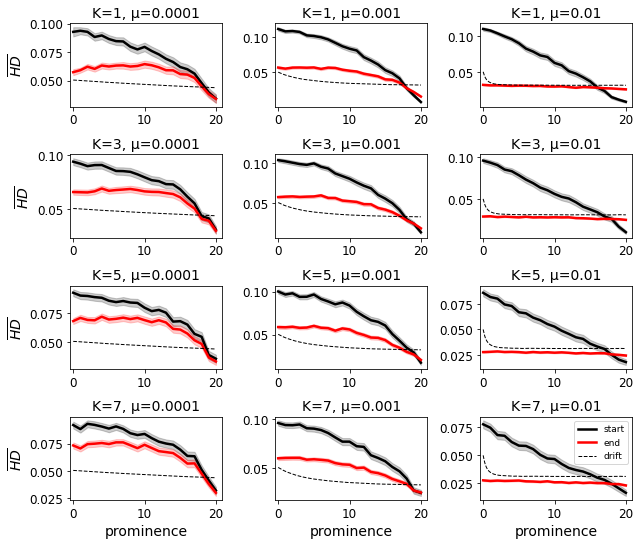

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.stats import ks_2samp

# Load the colormap and data
cmapWinter = plt.get_cmap('winter')
driftCollector = pickle.load(open(r"C:\Users\pmh\NKEarlyData\driftCollector.p", "rb"))
names = ['E', 'P', 'HD']

# Define the mutation rates and K values
Mys = [0.0001, 0.001, 0.01]
Ks = [1, 3, 5, 7]

plt.figure(figsize=(9, 8))
where = 1
num_rows = 4
num_cols = 3

for row, K in enumerate(Ks):
    for col, my in enumerate(Mys):
        ax = plt.subplot(num_rows, num_cols, where)
        where += 1

        # Load drift data for HD
        D = np.array(driftCollector[f"{my} {names[2]}"])
        drift_mean = D.mean(axis=0)
        drift_start_distribution = D[:, 0]

        # Raw HD data from collectorShrunk (index 2 is raw replicate data)
        raw_HD_data = collectorShrunk[f"{K} {my}"][2]  # [means, CIs, raw HD replicates]

        start_means, end_means = [], []
        start_ci_low, start_ci_high = [], []
        end_ci_low, end_ci_high = [], []

        for i in range(21):
            data = raw_HD_data[i]
            if isinstance(data, list):
                data = np.array(data)

            if data.ndim != 2 or data.shape[1] < 2:
                start_means.append(np.nan)
                end_means.append(np.nan)
                start_ci_low.append(np.nan)
                start_ci_high.append(np.nan)
                end_ci_low.append(np.nan)
                end_ci_high.append(np.nan)
                continue

            start_vals = data[:, 0]
            end_vals = data[:, -1]

            start_vals = start_vals[~np.isnan(start_vals)]
            end_vals = end_vals[~np.isnan(end_vals)]

            if len(start_vals) > 1:
                sm = np.mean(start_vals)
                se = np.std(start_vals, ddof=1) / np.sqrt(len(start_vals))
                start_means.append(sm)
                start_ci_low.append(sm - 1.96 * se)
                start_ci_high.append(sm + 1.96 * se)
            else:
                start_means.append(np.nan)
                start_ci_low.append(np.nan)
                start_ci_high.append(np.nan)

            if len(end_vals) > 1:
                em = np.mean(end_vals)
                ee = np.std(end_vals, ddof=1) / np.sqrt(len(end_vals))
                end_means.append(em)
                end_ci_low.append(em - 1.96 * ee)
                end_ci_high.append(em + 1.96 * ee)
            else:
                end_means.append(np.nan)
                end_ci_low.append(np.nan)
                end_ci_high.append(np.nan)

        x = np.arange(21)

        # Plot confidence intervals
        ax.fill_between(x, start_ci_low, start_ci_high, color='black', alpha=0.2)
        ax.fill_between(x, end_ci_low, end_ci_high, color='red', alpha=0.2)

        # Plot mean lines
        ax.plot(x, start_means, color='black', linewidth=2.5, label='start')
        ax.plot(x, end_means, color='red', linewidth=2.5, label='end')
        ax.plot(np.linspace(0, 20, len(drift_mean)), drift_mean, 'k--', linewidth=1.0, label='drift')

        # Optional KS test + markers
        for i in range(21):
            data = raw_HD_data[i]
            if isinstance(data, list):
                data = np.array(data)

            if data.ndim != 2 or data.shape[1] < 2:
                continue

            start_vals = data[:, 0]
            end_vals = data[:, -1]
            start_vals = start_vals[~np.isnan(start_vals)]
            end_vals = end_vals[~np.isnan(end_vals)]

            

        # Labels & title
        ax.set_title(f"K={K}, μ={my}", fontsize=14)
        if col == 0:
            ax.set_ylabel(r"$\overline{HD}$", fontsize=14)
        if row == num_rows - 1:
            ax.set_xlabel("prominence", fontsize=14)

        ax.set_xlim(-0.4, 20.9)
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)

        if row == num_rows - 1 and col == num_cols - 1:
            ax.legend(loc='upper right', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('statsP3_CI.pdf', dpi=300, bbox_inches='tight')
plt.show()
